In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# a) Laden des Datensatzes
X = np.load(r'data.npy')

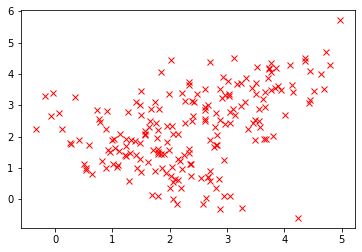

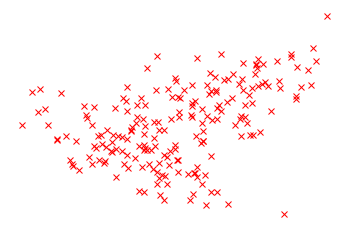

In [3]:
# b.1) Plotten des Datensatzes X mit Achsen-Linien
plt.plot(X[:,0], X[:,1],'rx')
#plt.axis('on')
plt.show()

# b.2) Plotten des Datensatzes X ohne Achsen-Linien
plt.plot(X[:,0], X[:,1],'rx')
plt.axis('off')
plt.show()

In [4]:
# c) Trainieren des GaussianMixture Verfahrens
gmm = GaussianMixture(n_components = 4, max_iter = 100, verbose = 2, verbose_interval = 1, random_state = 1)
gmm = gmm.fit(X)

Initialization 0
  Iteration 1	 time lapse 0.69107s	 ll change inf
  Iteration 2	 time lapse 0.00297s	 ll change 0.02638
  Iteration 3	 time lapse 0.00201s	 ll change 0.00807
  Iteration 4	 time lapse 0.00198s	 ll change 0.00375
  Iteration 5	 time lapse 0.00299s	 ll change 0.00213
  Iteration 6	 time lapse 0.00199s	 ll change 0.00138
  Iteration 7	 time lapse 0.00199s	 ll change 0.00098
Initialization converged: True	 time lapse 0.70501s	 ll -2.86252


In [13]:
# d) Clustervorhersage für die Trainingsdaten,Ausgabe der vorhergesagten Wahrscheinlichkeiten für jede Instanz,Means,
# weights, covariances der Clusterzentren
cluster = gmm.predict(X)
probs = gmm.predict_proba(X)
means = gmm.means_
weights = gmm.weights_
covariances = gmm.covariances_

print(cluster[0:5])
print(np.around(probs[0:5], 3))
print(means[0:5])
print(weights[0:5])
print(covariances[0:5])

[2 2 2 3 0]
[[0.058 0.001 0.876 0.064]
 [0.004 0.002 0.626 0.368]
 [0.469 0.    0.53  0.001]
 [0.    0.2   0.002 0.798]
 [0.618 0.    0.382 0.   ]]
[[3.83231285 3.73971617]
 [2.17046898 0.83815294]
 [2.78621621 2.85337214]
 [1.24617502 1.86934982]]
[0.19809151 0.22057678 0.25427269 0.32705902]
[[[ 0.34527613  0.16093846]
  [ 0.16093846  0.40434966]]

 [[ 0.43488384 -0.29084637]
  [-0.29084637  0.47332685]]

 [[ 0.35301884 -0.12569163]
  [-0.12569163  0.45750353]]

 [[ 0.51575436 -0.14608269]
  [-0.14608269  0.56058388]]]


In [ ]:
# e) Plotten des Arrays X mit Cluterzuordnung
plt.scatter(X[:,0], X[:,1], c= cluster, s=40, cmap = 'winter')
plt.scatter(means[:,0], means[:,1], c = 'black', s = 100)
plt.show()

In [ ]:
# f)
# Trainieren des KMeans mit den in Teilaufgabe d) erarbeiteten k Clusterzentren
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 1)
kmeans = kmeans.fit(X)

# Vorhersage
y_pred = kmeans.fit_predict(X)

# plotten
plt.scatter(X[:,0], X[:,1], c= y_pred, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

